# Unique VAERS IDs for COVID-19 vaccines (2020 - 2023)

In [43]:
import pandas as pd

unique_vaers_ids = set()  # Set to track unique VAERS IDs

for year in range(2020, 2024):
    try:
        vaers_vax_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        vaers_vax_data = pd.read_csv(vaers_vax_path, encoding="Iso-8859-1", low_memory=False)

        # Filter for COVID-19 vaccines and update unique VAERS IDs
        covid_vax_ids = vaers_vax_data[vaers_vax_data['VAX_TYPE'].str.contains('COVID19')]['VAERS_ID']
        unique_vaers_ids.update(covid_vax_ids)
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Calculate the total number of unique VAERS_IDs
total_unique_covid_vaers_ids = len(unique_vaers_ids)
print(f"Total unique COVID-19 VAERS_IDs: {total_unique_covid_vaers_ids}")


Total unique COVID-19 VAERS_IDs: 999286


In [44]:
len(unique_vaers_ids)

999286

# Total number of COVID-19 vaccine entries (2020 - 2023)

In [45]:
import pandas as pd

total_covid_entries = 0

for year in range(2020, 2024):
    try:
        vaers_vax_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        vaers_vax_data = pd.read_csv(vaers_vax_path, encoding="Iso-8859-1", low_memory=False)

        # Count entries for COVID-19 vaccines
        covid_entries_count = len(vaers_vax_data[vaers_vax_data['VAX_TYPE'].str.contains('COVID19')])
        total_covid_entries += covid_entries_count
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

print(f"Total number of COVID-19 vaccine entries (2020 - 2023): {total_covid_entries}")


Total number of COVID-19 vaccine entries (2020 - 2023): 1058509


# Vaccine entries by manufacturer (2020 - 2023)

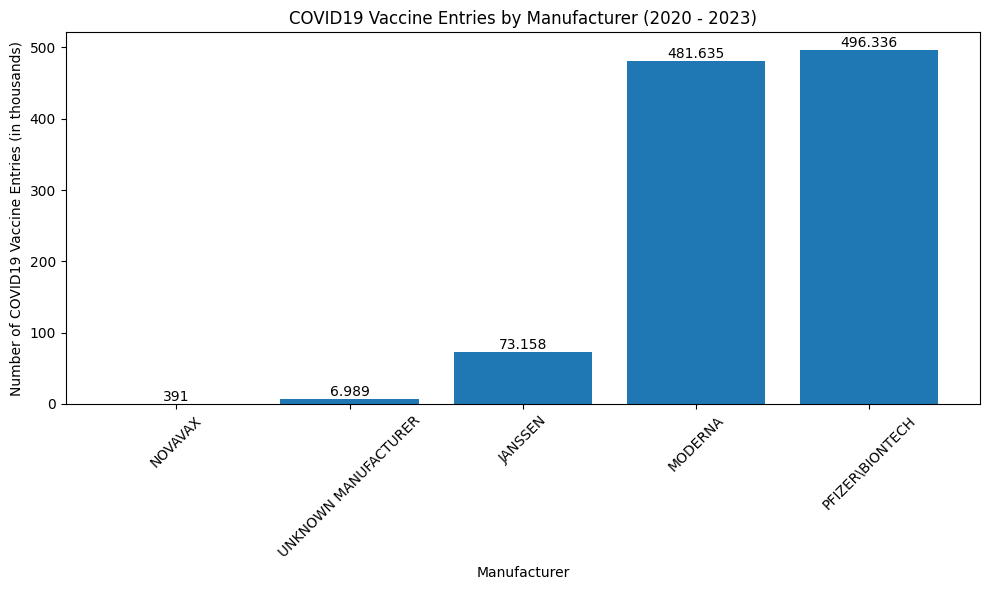

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dictionary to store counts of COVID19 vaccines by manufacturer
covid_vax_counts = {}

for year in range(2020, 2024):
    try:
        filename = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"  # Update the path
        data = pd.read_csv(filename, encoding="Iso-8859-1", low_memory=False)
        # Filter for COVID19 vaccines
        covid_data = data[data['VAX_TYPE'].str.contains('COVID19')]
        # Count by manufacturer
        for manufacturer in covid_data['VAX_MANU'].unique():
            covid_vax_counts[manufacturer] = covid_vax_counts.get(manufacturer, 0) + len(covid_data[covid_data['VAX_MANU'] == manufacturer])
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Sort the dictionary by counts in increasing order
sorted_covid_vax_counts = dict(sorted(covid_vax_counts.items(), key=lambda item: item[1]))

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_covid_vax_counts.keys(), sorted_covid_vax_counts.values())

plt.xlabel('Manufacturer')
plt.ylabel('Number of COVID19 Vaccine Entries (in thousands)')
plt.title('COVID19 Vaccine Entries by Manufacturer (2020 - 2023)')
plt.xticks(rotation=45)

# Format y-axis in thousands with a dot
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000):,}'.replace(',', '.')))

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', '.'),
             ha='center', va='bottom')
    
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Entries_by_Manufacturer.png')
plt.show()


In [37]:
covid_data

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,2547730,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
1,2547731,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,2547733,COVID19,MODERNA,042h22a,1,IM,LA,COVID19 (COVID19 (MODERNA))
8,2547739,COVID19,MODERNA,04H22A,5,IM,LA,COVID19 (COVID19 (MODERNA))
10,2547741,COVID19,MODERNA,NaN,3,IM,NaN,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...
119352,2717528,COVID19,PFIZER\BIONTECH,EN6200,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
119353,2717529,COVID19,PFIZER\BIONTECH,EN9581,1,NaN,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
119354,2717530,COVID19,PFIZER\BIONTECH,NaN,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
119359,2717538,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))


In [40]:
391 + 6989 + 73158 + 464997+ 473522

1019057

# Deaths by manufacturer (2020 - 2023)

drop VAERS_ID duplicates because a person can only die once

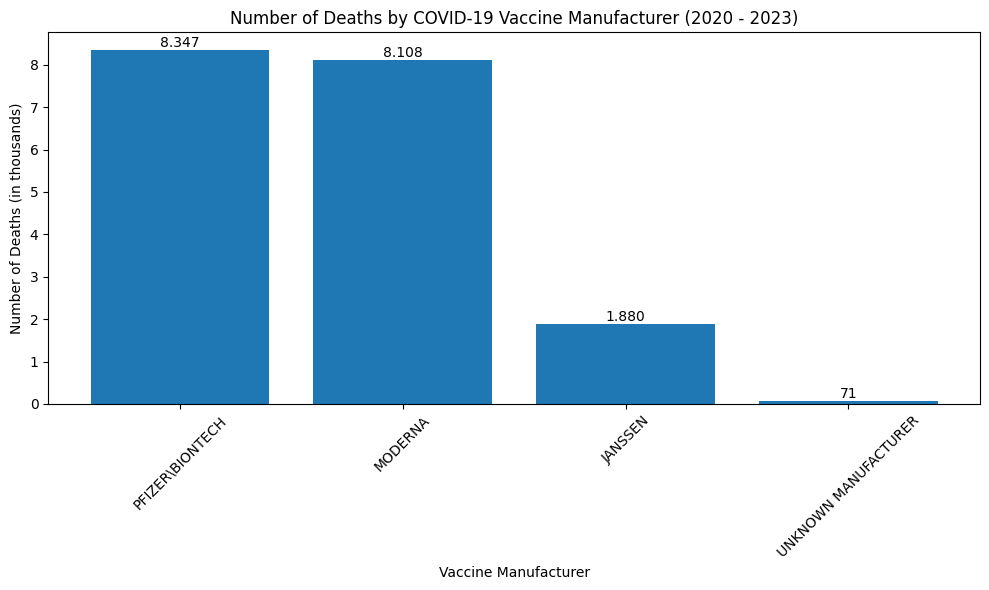

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Custom formatter function for y-axis in thousands
def thousands_formatter(y, pos):
    return f'{int(y / 1000):,}'.replace(',', '.')

deaths_per_manufacturer = {}

for year in range(2020, 2024):
    try:
        # Load mortality data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="Iso-8859-1", low_memory=False)
        deaths_data = mortality_data[mortality_data['DIED'] == 'Y']

        # Load vaccine data
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False)
        # Filter for COVID-19 vaccines
        covid_vaccine_data = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]

        # Merge datasets on VAERS_ID
        merged_data = pd.merge(deaths_data, covid_vaccine_data, on='VAERS_ID', how='inner')
        merged_data = merged_data.drop_duplicates(subset=['VAERS_ID'])

        # Aggregate deaths by manufacturer for COVID-19 vaccines
        for manufacturer in merged_data['VAX_MANU'].unique():
            deaths_per_manufacturer[manufacturer] = deaths_per_manufacturer.get(manufacturer, 0) + len(merged_data[merged_data['VAX_MANU'] == manufacturer])
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Sort the dictionary by counts in decreasing order
sorted_deaths_per_manufacturer = dict(sorted(deaths_per_manufacturer.items(), key=lambda item: item[1], reverse=True))

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_deaths_per_manufacturer.keys(), sorted_deaths_per_manufacturer.values())

# Set the y-axis formatter for thousands with a dot
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Number of Deaths (in thousands)')
plt.title('Number of Deaths by COVID-19 Vaccine Manufacturer (2020 - 2023)')

# Annotate each bar with its value, formatted with a dot for thousands
for bar in bars:
    height = bar.get_height()
    formatted_height = f'{int(height):,}'.replace(',', '.')  # Format with a dot for thousands
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_height,
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Deaths_by_Manufacturer.png')
plt.show()

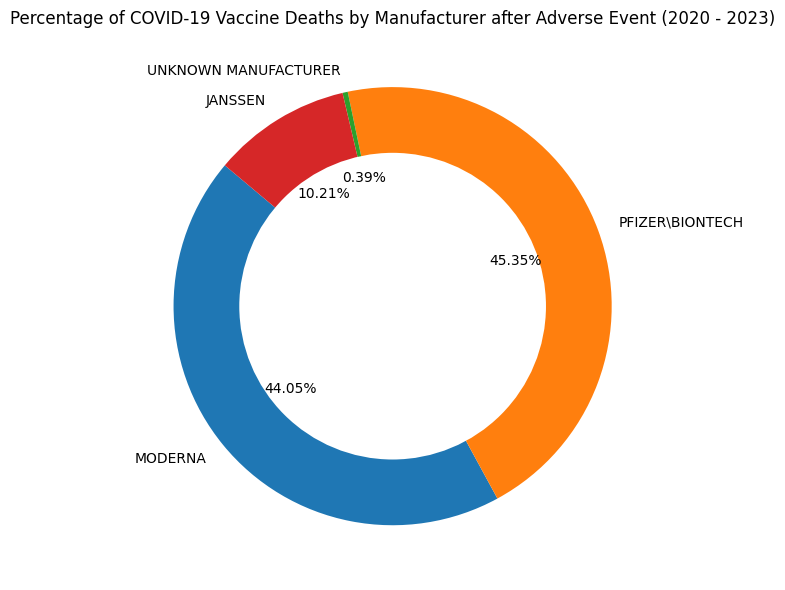

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

deaths_per_manufacturer = {}

for year in range(2020, 2024):
    try:
        # Load mortality and vaccine data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="Iso-8859-1", low_memory=False)
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False)

        # Filter and merge datasets
        deaths_data = mortality_data[mortality_data['DIED'] == 'Y']
        covid_vaccine_data = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]
        merged_data = pd.merge(deaths_data, covid_vaccine_data, on='VAERS_ID', how='inner')
        merged_data = merged_data.drop_duplicates(subset=['VAERS_ID'])

        # Aggregate deaths by manufacturer
        for manufacturer in merged_data['VAX_MANU'].unique():
            deaths_per_manufacturer[manufacturer] = deaths_per_manufacturer.get(manufacturer, 0) + len(merged_data[merged_data['VAX_MANU'] == manufacturer])
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Creating a doughnut plot
plt.figure(figsize=(10, 6))
plt.pie(deaths_per_manufacturer.values(), labels=deaths_per_manufacturer.keys(), autopct='%1.2f%%', startangle=140)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.title('Percentage of COVID-19 Vaccine Deaths by Manufacturer after Adverse Event (2020 - 2023)')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Deaths_by_Manufacturer_Percentage_Doughnut.png')
plt.show()

# Deaths by vaccine type (mRNA vs Vector) (2020 - 2023)

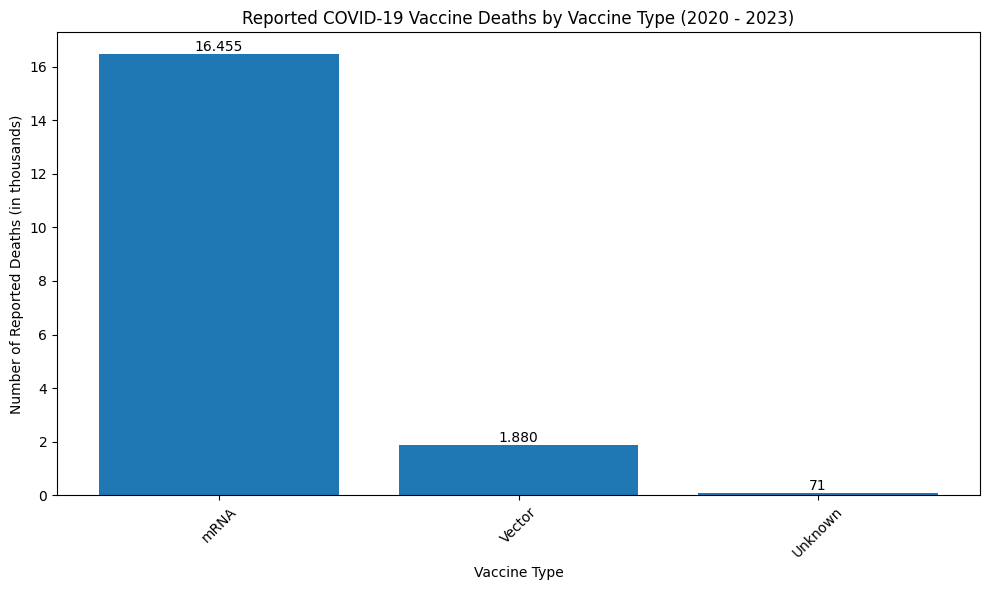

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

deaths_per_vaccine_type = {'mRNA': 0, 'Vector': 0, 'Unknown': 0}

# Mapping manufacturers to vaccine types
vaccine_type_map = {
    'PFIZER\\BIONTECH': 'mRNA', 
    'MODERNA': 'mRNA', 
    'JANSSEN': 'Vector', 
    'UNKNOWN MANUFACTURER': 'Unknown'
    # Add other manufacturers as necessary
}

for year in range(2020, 2024):
    try:
        # Load mortality and vaccine data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="Iso-8859-1", low_memory=False)
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False)

        # Filter and merge datasets
        deaths_data = mortality_data[mortality_data['DIED'] == 'Y']
        covid_vaccine_data = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]
        merged_data = pd.merge(deaths_data, covid_vaccine_data, on='VAERS_ID', how='inner')
        merged_data = merged_data.drop_duplicates(subset=['VAERS_ID'])

        # Aggregate deaths by vaccine type
        for index, row in merged_data.iterrows():
            vaccine_type = vaccine_type_map.get(row['VAX_MANU'], 'Unknown')
            deaths_per_vaccine_type[vaccine_type] += 1
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Custom formatter function for y-axis in thousands with a dot
def thousands_formatter(y, pos):
    return f'{int(y / 1000):,}'.replace(',', '.')

# Creating a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(deaths_per_vaccine_type.keys(), deaths_per_vaccine_type.values())
plt.xlabel('Vaccine Type')
plt.ylabel('Number of Reported Deaths (in thousands)')
plt.title('Reported COVID-19 Vaccine Deaths by Vaccine Type (2020 - 2023)')

# Set the y-axis formatter for thousands with a dot
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    formatted_height = f'{int(height):,}'.replace(',', '.')  # Format with a dot for thousands
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_height,
             ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Deaths_by_Vaccine_Type.png')
plt.show()


# Percentage of deaths by vaccine type (mRNA vs Vector) (2020 - 2023)

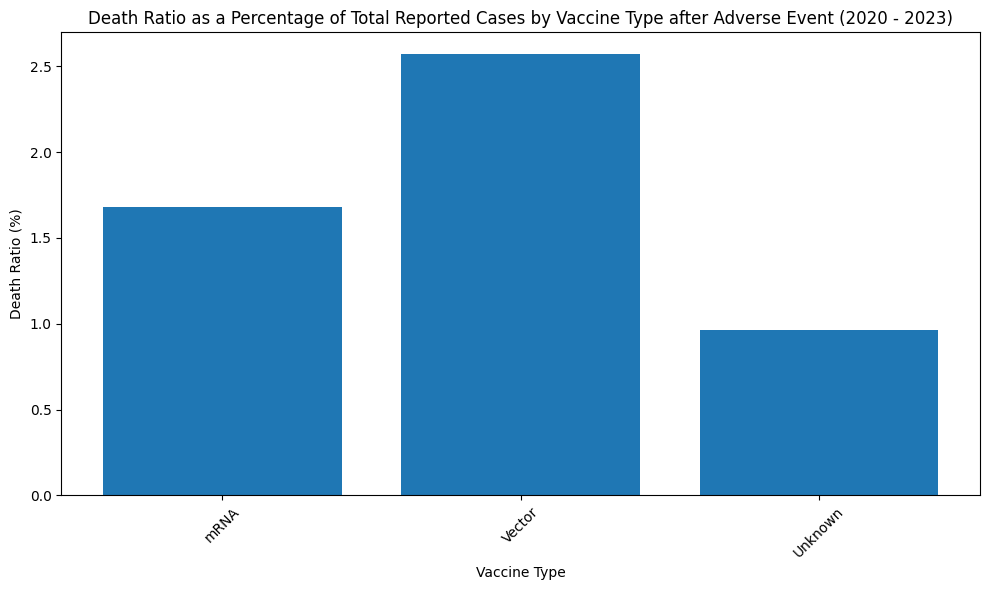

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

deaths_per_vaccine_type = {'mRNA': 0, 'Vector': 0, 'Unknown': 0}
total_cases_per_vaccine_type = {'mRNA': 0, 'Vector': 0, 'Unknown': 0}

# Mapping manufacturers to vaccine types
vaccine_type_map = {
    'PFIZER\\BIONTECH': 'mRNA', 
    'MODERNA': 'mRNA', 
    'JANSSEN': 'Vector',
    'UNKNOWN MANUFACTURER': 'Unknown'
}

for year in range(2020, 2024):
    try:
        # Load mortality and vaccine data with only the necessary columns
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="Iso-8859-1", low_memory=False, usecols=['VAERS_ID', 'DIED'])
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False, usecols=['VAERS_ID', 'VAX_MANU', 'VAX_TYPE'])

        # Filter and merge datasets for deaths
        deaths_data = mortality_data[mortality_data['DIED'] == 'Y']
        covid_vaccine_deaths_data = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]
        merged_deaths_data = pd.merge(deaths_data, covid_vaccine_deaths_data, on='VAERS_ID', how='inner')
        merged_deaths_data = merged_deaths_data.drop_duplicates(subset=['VAERS_ID'])

        # Aggregate deaths by vaccine type
        for index, row in merged_deaths_data.iterrows():
            vaccine_type = vaccine_type_map.get(row['VAX_MANU'], 'Unknown')
            deaths_per_vaccine_type[vaccine_type] += 1

        # Filter and merge datasets for total cases
        covid_vaccine_total_data = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]
        merged_total_data = pd.merge(mortality_data, covid_vaccine_total_data, on='VAERS_ID', how='inner')

        # Aggregate total cases by vaccine type
        for index, row in merged_total_data.iterrows():
            vaccine_type = vaccine_type_map.get(row['VAX_MANU'], 'Unknown')
            total_cases_per_vaccine_type[vaccine_type] += 1

    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Calculate the death ratio for each vaccine type
death_ratio_per_vaccine_type = {k: (deaths_per_vaccine_type[k] / total_cases_per_vaccine_type[k]) * 100 if total_cases_per_vaccine_type[k] > 0 else 0 for k in total_cases_per_vaccine_type}

# Creating a bar chart for the death ratio
plt.figure(figsize=(10, 6))
plt.bar(death_ratio_per_vaccine_type.keys(), death_ratio_per_vaccine_type.values())
plt.xlabel('Vaccine Type')
plt.ylabel('Death Ratio (%)')
plt.title('Death Ratio as a Percentage of Total Reported Cases by Vaccine Type after Adverse Event (2020 - 2023)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Death_Ratio_by_Vaccine_Type.png')
plt.show()


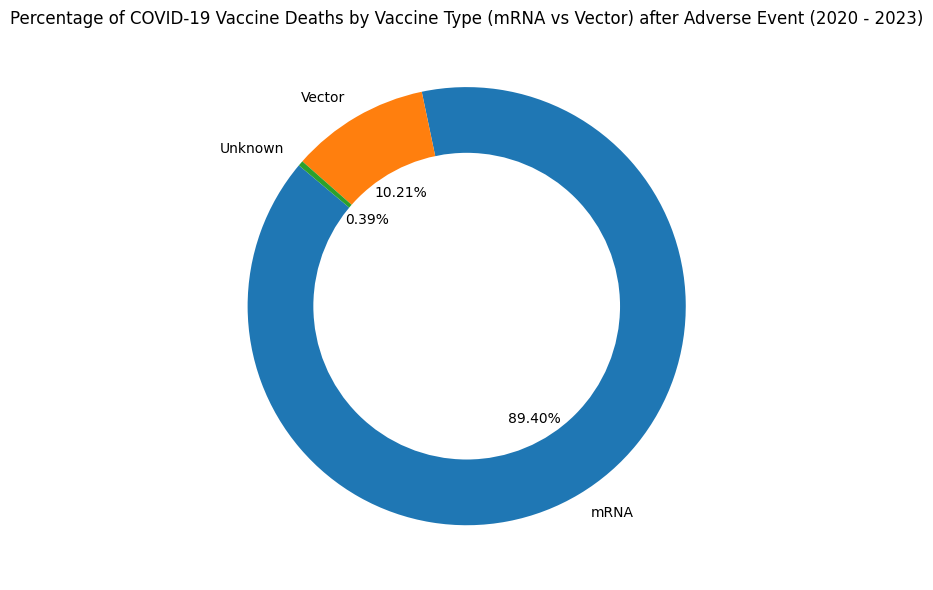

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

deaths_per_vaccine_type = {'mRNA': 0, 'Vector': 0, 'Unknown': 0}

# Mapping manufacturers to vaccine types
vaccine_type_map = {
    'PFIZER\\BIONTECH': 'mRNA', 
    'MODERNA': 'mRNA', 
    'JANSSEN': 'Vector', 
    'UNKNOWN MANUFACTURER': 'Unknown'
    # Add other manufacturers and types as necessary
}

for year in range(2020, 2024):
    try:
        # Load mortality and vaccine data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="Iso-8859-1", low_memory=False)
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False)

        # Filter and merge datasets
        deaths_data = mortality_data[mortality_data['DIED'] == 'Y']
        covid_vaccine_data = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]
        merged_data = pd.merge(deaths_data, covid_vaccine_data, on='VAERS_ID', how='inner')
        merged_data = merged_data.drop_duplicates(subset=['VAERS_ID'])

        # Aggregate deaths by vaccine type
        for index, row in merged_data.iterrows():
            vaccine_type = vaccine_type_map.get(row['VAX_MANU'], None)
            if vaccine_type:
                deaths_per_vaccine_type[vaccine_type] += 1
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Creating a doughnut plot
plt.figure(figsize=(10, 6))
plt.pie(deaths_per_vaccine_type.values(), labels=deaths_per_vaccine_type.keys(), autopct='%1.2f%%', startangle=140)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.title('Percentage of COVID-19 Vaccine Deaths by Vaccine Type (mRNA vs Vector) after Adverse Event (2020 - 2023)')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Deaths_by_Vaccine_Type_Percentage_Doughnut.png')
plt.show()

# Relative death ratio by vaccine type (mRNA vs Vector) (2020 - 2023)

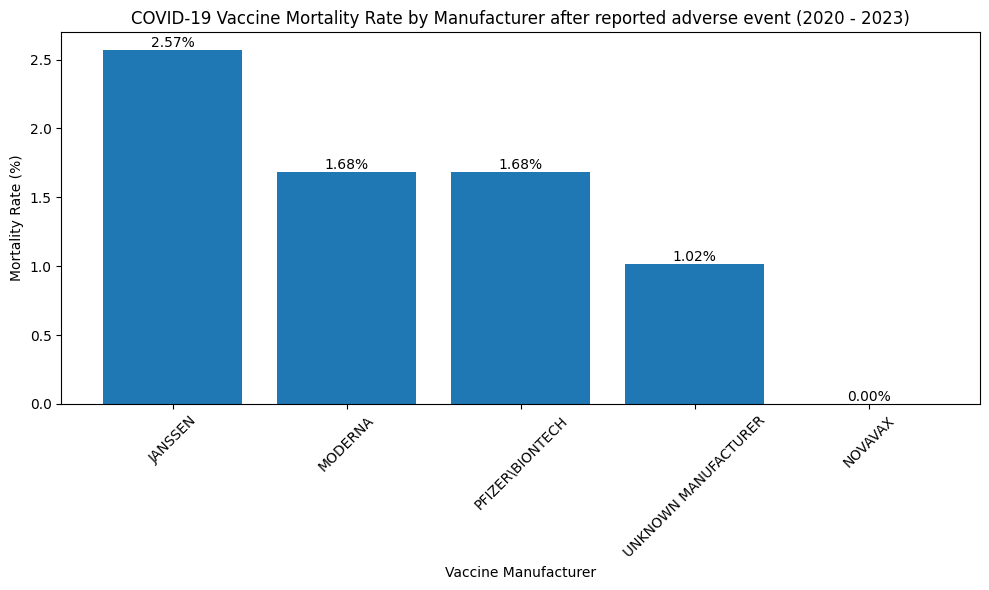

In [53]:
import pandas as pd

# Initialize dictionaries to store vaccine counts and death counts per manufacturer
vaccine_counts = {}
death_counts = {}

for year in range(2020, 2024):
    try:
        # Load mortality data and vaccine data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="Iso-8859-1", low_memory=False)
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False)

        # Filter for COVID-19 vaccines
        covid_vaccine_data = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]

        # Count total vaccines by manufacturer
        vaccine_counts_year = covid_vaccine_data['VAX_MANU'].value_counts()
        for manufacturer, count in vaccine_counts_year.items():
            vaccine_counts[manufacturer] = vaccine_counts.get(manufacturer, 0) + count

        # Count deaths for COVID-19 vaccines
        deaths_data = pd.merge(mortality_data[mortality_data['DIED'] == 'Y'], covid_vaccine_data, on='VAERS_ID')
        deaths_data = deaths_data.drop_duplicates(subset=['VAERS_ID'])
        death_counts_year = deaths_data['VAX_MANU'].value_counts()
        for manufacturer, count in death_counts_year.items():
            death_counts[manufacturer] = death_counts.get(manufacturer, 0) + count
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Calculate mortality rate per manufacturer
mortality_rates = {}
for manufacturer in vaccine_counts.keys():
    total_vaccinations = vaccine_counts[manufacturer]
    deaths = death_counts.get(manufacturer, 0)
    mortality_rate = (deaths / total_vaccinations) * 100 if total_vaccinations > 0 else 0
    mortality_rates[manufacturer] = mortality_rate

# Sorting the mortality rates for plotting
sorted_mortality_rates = dict(sorted(mortality_rates.items(), key=lambda item: item[1], reverse=True))

# Plotting the mortality rates
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_mortality_rates.keys(), sorted_mortality_rates.values())

plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Mortality Rate (%)')
plt.title('COVID-19 Vaccine Mortality Rate by Manufacturer after reported adverse event (2020 - 2023)')

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Mortality_Rate_by_Manufacturer.png')
plt.show()

# Adverse events by manufacturer (2020 - 2023)

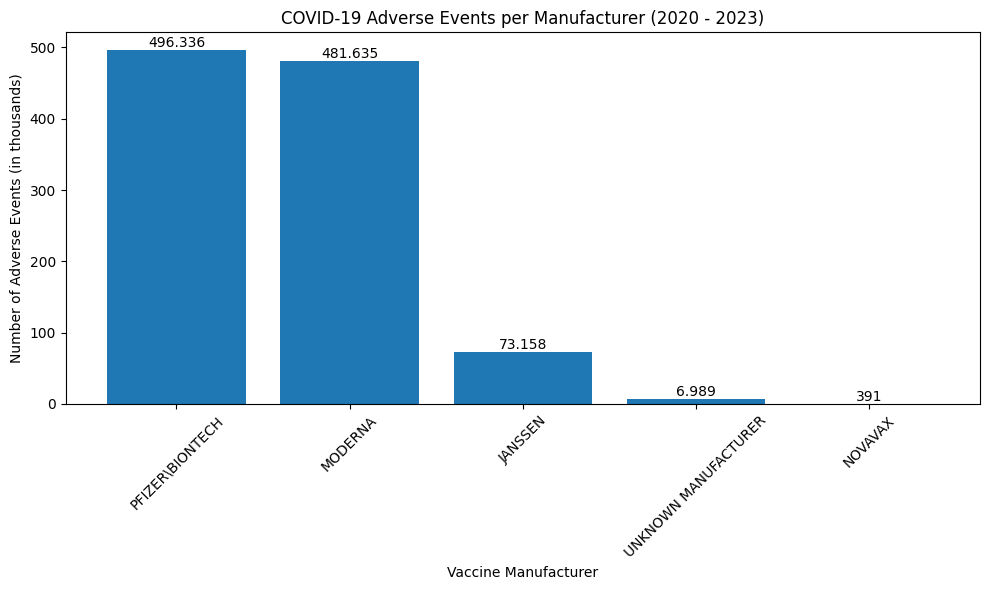

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Custom formatter function for y-axis in thousands with a dot
def thousands_formatter(y, pos):
    return f'{int(y / 1000):,}'.replace(',', '.')

adverse_events_per_manufacturer = {}

for year in range(2020, 2024):
    try:
        # Load vaccine data
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False)

        # Filter for COVID-19 vaccines
        covid_vaccine_data = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]

        # Count adverse events by manufacturer
        for manufacturer in covid_vaccine_data['VAX_MANU'].unique():
            adverse_events_per_manufacturer[manufacturer] = adverse_events_per_manufacturer.get(manufacturer, 0) + len(covid_vaccine_data[covid_vaccine_data['VAX_MANU'] == manufacturer])
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Sorting the data for plotting
sorted_adverse_events = dict(sorted(adverse_events_per_manufacturer.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_adverse_events.keys(), sorted_adverse_events.values())

# Set the y-axis formatter for thousands with a dot
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Number of Adverse Events (in thousands)')
plt.title('COVID-19 Adverse Events per Manufacturer (2020 - 2023)')
plt.xticks(rotation=45)

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    formatted_height = f'{int(height):,}'.replace(',', '.')  # Format with a dot for thousands
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_height,
             ha='center', va='bottom')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Adverse_Events_by_Manufacturer.png')
plt.show()

# Deaths by age group (2020 - 2023)

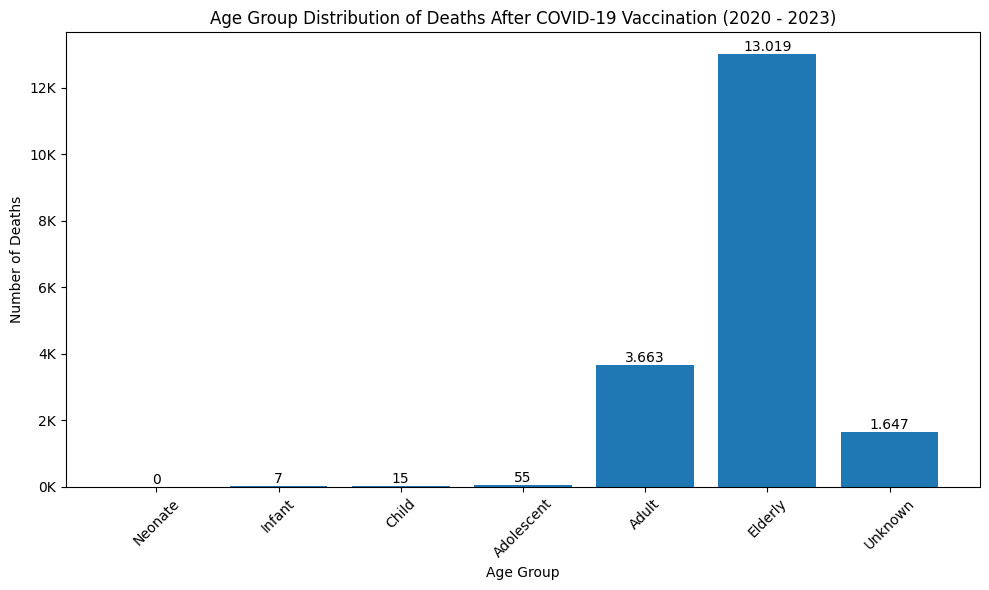

In [55]:
# Modified script to add the raw number on top of each bar in the plot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Initialize a dictionary to store the age group counts for deaths
age_group_deaths = {
    'Neonate': 0, 'Infant': 0, 'Child': 0, 'Adolescent': 0, 'Adult': 0, 'Elderly': 0, 'Unknown': 0
}

# Define function to categorize age
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'  
    elif age < 1/12:  # Neonate: less than 1 month
        return 'Neonate'
    elif age < 2:  # Infant: less than 2 years
        return 'Infant'
    elif age < 12:  # Child: less than 12 years
        return 'Child'
    elif age < 18:  # Adolescent: less than 18 years
        return 'Adolescent'
    elif age < 65:  # Adult: less than 65 years
        return 'Adult'
    else:  # Elderly: 65 years and older
        return 'Elderly'

for year in range(2020, 2024):
    try:
        # Load data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="Iso-8859-1", low_memory=False)
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False)

        # Filter for COVID-19 vaccines and merge with mortality data
        covid_vax_ids = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]['VAERS_ID']
        deaths_data = mortality_data[mortality_data['DIED'] == 'Y']
        merged_data = deaths_data.merge(covid_vax_ids.to_frame(), how='inner', on='VAERS_ID')
        merged_data = merged_data.drop_duplicates(subset=['VAERS_ID'])

        # Categorize deaths by age group
        merged_data['AGE_GROUP'] = merged_data['AGE_YRS'].apply(categorize_age)
        age_group_counts = merged_data['AGE_GROUP'].value_counts()
        for age_group, count in age_group_counts.items():
            age_group_deaths[age_group] += count
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Custom formatter to display values in thousands
def thousands_formatter(x, pos):
    return f'{x/1000:.0f}K'

# Plotting the data 
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_deaths.keys(), age_group_deaths.values())
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.title('Age Group Distribution of Deaths After COVID-19 Vaccination (2020 - 2023)')

# Annotate each bar with the raw number formatted with a dot as the thousands separator
for bar in bars:
    height = bar.get_height()
    formatted_height = f'{height:,.0f}'.replace(',', '.')
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_height,
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Deaths_by_Age_Group.png')
plt.show()

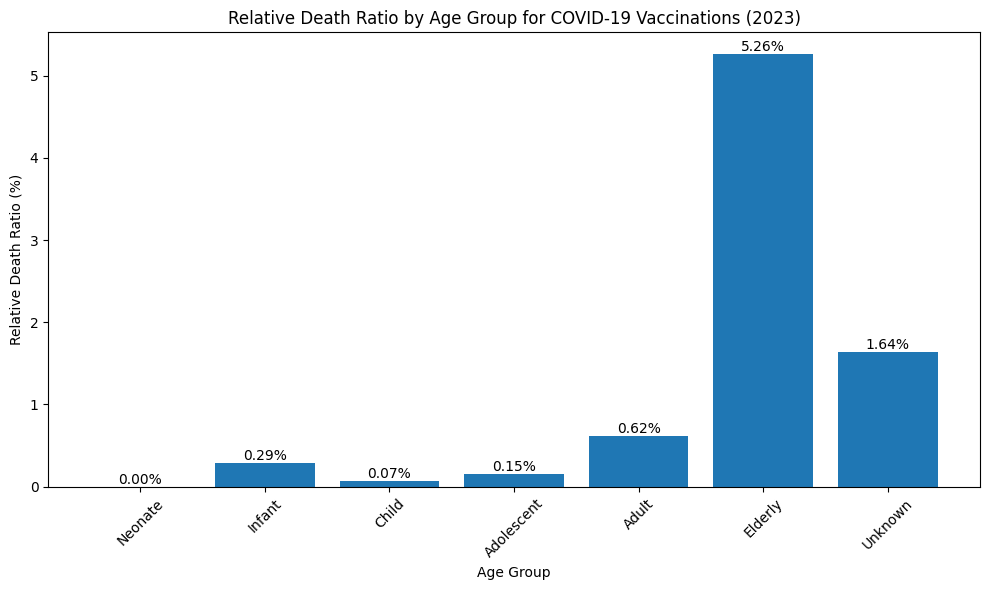

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize dictionaries for age group counts of deaths and vaccinations
age_group_deaths = {
    'Neonate': 0, 'Infant': 0, 'Child': 0, 'Adolescent': 0, 'Adult': 0, 'Elderly': 0, 'Unknown': 0
}
age_group_vaccinations = {
    'Neonate': 0, 'Infant': 0, 'Child': 0, 'Adolescent': 0, 'Adult': 0, 'Elderly': 0, 'Unknown': 0
}

# Function to categorize age
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 1/12:  # Neonate: less than 1 month
        return 'Neonate'
    elif age < 2:  # Infant: less than 2 years
        return 'Infant'
    elif age < 12:  # Child: less than 12 years
        return 'Child'
    elif age < 18:  # Adolescent: less than 18 years
        return 'Adolescent'
    elif age < 65:  # Adult: less than 65 years
        return 'Adult'
    else:  # Elderly: 65 years and older
        return 'Elderly'

for year in range(2020, 2024):
    try:
        # Load mortality and vaccine data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="ISO-8859-1", low_memory=False)
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="ISO-8859-1", low_memory=False)

        # Filter for COVID-19 vaccines and merge with mortality data
        covid_vax_ids = vaccine_data[vaccine_data['VAX_TYPE'].str.contains('COVID19')]['VAERS_ID']
        merged_data = mortality_data.merge(covid_vax_ids.to_frame(), how='inner', on='VAERS_ID')
        merged_data = merged_data.drop_duplicates(subset=['VAERS_ID'])

        # Filter for deaths and accumulate counts per age group
        deaths_data = merged_data[merged_data['DIED'] == 'Y']
        deaths_counts = deaths_data['AGE_YRS'].apply(categorize_age).value_counts()
        for age_group, count in deaths_counts.items():
            age_group_deaths[age_group] += count

        # Accumulate vaccinations counts per age group
        vaccination_counts = merged_data['AGE_YRS'].apply(categorize_age).value_counts()
        for age_group, count in vaccination_counts.items():
            age_group_vaccinations[age_group] += count

    except Exception as e:
        print(f"An error occurred for year {year}: {e}")      

# Calculate the relative death ratio per age group
relative_death_ratio = {group: (age_group_deaths[group] / age_group_vaccinations[group] * 100) 
                        if age_group_vaccinations[group] > 0 else 0 
                        for group in age_group_deaths}

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(relative_death_ratio.keys(), relative_death_ratio.values())
plt.xlabel('Age Group')
plt.ylabel('Relative Death Ratio (%)')
plt.title('Relative Death Ratio by Age Group for COVID-19 Vaccinations (2023)')

# Annotate each bar with the relative death ratio
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Relative_Death_Ratio_by_Age_Group.png')
plt.show()

In [34]:
deaths_data

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
197,2548065,01/02/2023,CA,64.0,64.0,NaN,F,NaN,something crawling inside her body abdominal p...,Y,...,none,cervical cancer stage 4 leading to death,NaN,NaN,2,01/02/2023,NaN,NaN,Y,penicillin
526,2548558,01/03/2023,NaN,NaN,NaN,NaN,U,NaN,Found dead Christmas morning; This spontaneous...,Y,...,Diabetes mellitus,NaN,NaN,"USMODERNATX, INC.MOD20226",2,01/03/2023,NaN,NaN,NaN,NaN
532,2548790,01/03/2023,TN,63.0,63.0,NaN,F,NaN,Patient admitted 11/10-12/19; transferred to S...,Y,...,NaN,NaN,NaN,NaN,2,01/03/2023,NaN,NaN,NaN,NaN
544,2548806,01/03/2023,TN,73.0,73.0,NaN,F,NaN,Admitted 12/21/2022 to a local Medical Center ...,Y,...,NaN,NaN,NaN,NaN,2,01/03/2023,NaN,NaN,NaN,NaN
562,2548831,01/03/2023,MI,74.0,74.0,NaN,M,NaN,Discharge Provider: MD Primary Care Physician ...,Y,...,Admission to Hospital notes: Primary Care Phys...,Nocturnal hypoxemia ILD (interstitial lung dis...,NaN,NaN,2,01/03/2023,NaN,NaN,NaN,Influenza [Influenza Vaccines] Lisinopril [Ace...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49553,2717064,11/23/2023,IL,35.0,35.0,NaN,M,NaN,"Sudden death. Autopsy reports body unharmed, a...",Y,...,NaN,NaN,NaN,NaN,2,11/23/2023,NaN,NaN,NaN,NaN
49555,2717078,11/23/2023,FL,NaN,NaN,NaN,U,NaN,she administered the Covid shot to. 3 of her p...,Y,...,NaN,NaN,NaN,"USMODERNATX, INC.MOD20237",2,11/23/2023,NaN,NaN,NaN,NaN
49584,2717438,11/24/2023,NY,NaN,NaN,NaN,U,NaN,Death; This spontaneous case was reported by a...,Y,...,NaN,NaN,NaN,"USMODERNATX, INC.MOD20237",2,11/23/2023,NaN,NaN,NaN,NaN
49604,2717460,11/24/2023,NaN,17.0,NaN,NaN,U,NaN,passed away; This spontaneous case was reporte...,Y,...,NaN,NaN,NaN,"USMODERNATX, INC.MOD20237",2,11/23/2023,NaN,NaN,NaN,NaN


In [25]:
age_group_vaccinations

{'Neonate': 59,
 'Infant': 1647,
 'Child': 19736,
 'Adolescent': 34648,
 'Adult': 573619,
 'Elderly': 232247,
 'Unknown': 98608}

In [26]:
age_group_deaths

{'Neonate': 0,
 'Infant': 6,
 'Child': 15,
 'Adolescent': 53,
 'Adult': 3609,
 'Elderly': 12786,
 'Unknown': 1600}

In [27]:
relative_death_ratio

{'Neonate': 0.0,
 'Infant': 0.36429872495446264,
 'Child': 0.07600324280502634,
 'Adolescent': 0.152966982221196,
 'Adult': 0.6291632599338585,
 'Elderly': 5.505345601880756,
 'Unknown': 1.6225864027259451}

# Keep track of VAERS_IDs already counted for deaths (Person can be vaccinated multiple times but can only die once)

idk if this makes sense that way because I don't know what 2 entries with DIED = Y for the same person mean

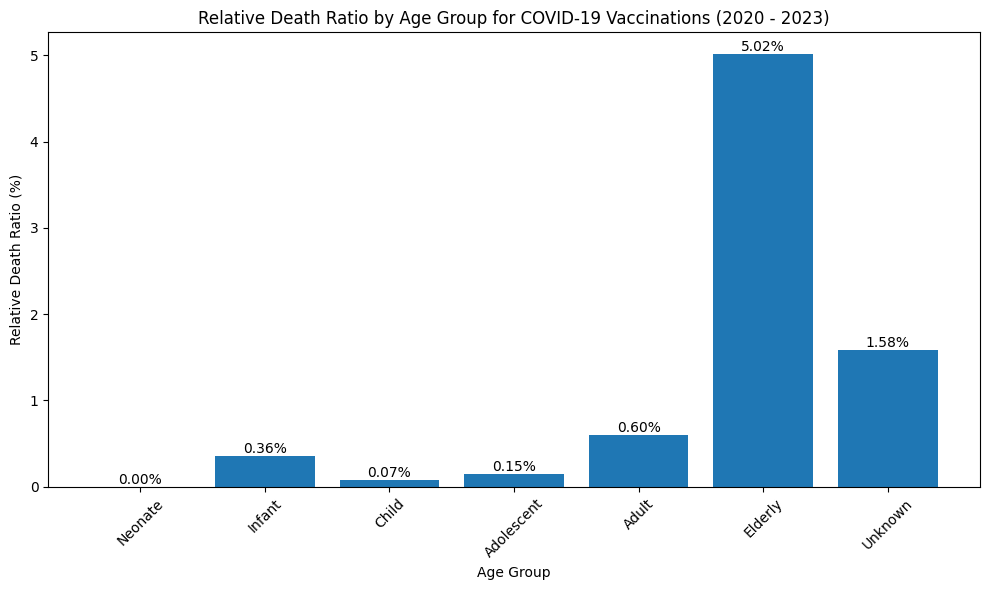

In [28]:
'''import pandas as pd
import matplotlib.pyplot as plt

# Initialize dictionaries for age group counts of deaths and vaccinations
age_group_deaths = {
    'Neonate': 0, 'Infant': 0, 'Child': 0, 'Adolescent': 0, 'Adult': 0, 'Elderly': 0, 'Unknown': 0
}
age_group_vaccinations = {
    'Neonate': 0, 'Infant': 0, 'Child': 0, 'Adolescent': 0, 'Adult': 0, 'Elderly': 0, 'Unknown': 0
}

# Set to keep track of VAERS_IDs already counted for deaths
counted_deaths_ids = set()

# Function to categorize age
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 1/12:
        return 'Neonate'
    elif age < 2:
        return 'Infant'
    elif age < 12:
        return 'Child'
    elif age < 18:
        return 'Adolescent'
    elif age < 65:
        return 'Adult'
    else:
        return 'Elderly'

for year in range(2020, 2024):
    try:
        # Load mortality and vaccine data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="ISO-8859-1", low_memory=False)
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="ISO-8859-1", low_memory=False)

        # Filter for COVID-19 vaccines and merge with mortality data
        covid_vax_ids = vaccine_data[vaccine_data['VAX_TYPE'] == 'COVID19']['VAERS_ID']
        merged_data = mortality_data.merge(covid_vax_ids.to_frame(), how='inner', on='VAERS_ID')

        # Filter for deaths and accumulate counts per age group
        deaths_data = merged_data[merged_data['DIED'] == 'Y']
        for _, row in deaths_data.iterrows():
            vaers_id = row['VAERS_ID']
            if vaers_id not in counted_deaths_ids:
                age_group = categorize_age(row['AGE_YRS'])
                age_group_deaths[age_group] += 1
                counted_deaths_ids.add(vaers_id)

        # Accumulate vaccinations counts per age group
        vaccination_counts = merged_data['AGE_YRS'].apply(categorize_age).value_counts()
        for age_group, count in vaccination_counts.items():
            age_group_vaccinations[age_group] += count

    except Exception as e:
        print(f"An error occurred for year {year}: {e}")      

# Calculate the relative death ratio per age group
relative_death_ratio = {group: (age_group_deaths[group] / age_group_vaccinations[group] * 100) 
                        if age_group_vaccinations[group] > 0 else 0 
                        for group in age_group_deaths}

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(relative_death_ratio.keys(), relative_death_ratio.values())
plt.xlabel('Age Group')
plt.ylabel('Relative Death Ratio (%)')
plt.title('Relative Death Ratio by Age Group for COVID-19 Vaccinations (2020 - 2023)')

# Annotate each bar with the relative death ratio
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Covid_Vaccinations/Relative_Death_Ratio_by_Age_Group.png')
plt.show()
'''

In [285]:
age_group_vaccinations

{'Neonate': 60,
 'Infant': 1671,
 'Child': 20126,
 'Adolescent': 35764,
 'Adult': 605458,
 'Elderly': 254910,
 'Unknown': 101068}

In [286]:
age_group_deaths

{'Neonate': 0,
 'Infant': 6,
 'Child': 15,
 'Adolescent': 53,
 'Adult': 3609,
 'Elderly': 12786,
 'Unknown': 1600}

In [287]:
relative_death_ratio

{'Neonate': 0.0,
 'Infant': 0.3590664272890485,
 'Child': 0.07453045811388255,
 'Adolescent': 0.14819371434962533,
 'Adult': 0.596077680037261,
 'Elderly': 5.015887960456632,
 'Unknown': 1.583092571338109}

In [289]:
total_count = sum(age_group_vaccinations.values())
total_count

1019057